In [1]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os, sys
# os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

In [158]:
import matplotlib
# import pmdarima as pm

In [2]:
df = pd.read_csv("./powerconsumption/pjm_hourly_est.csv")

In [3]:
df.columns

Index(['Datetime', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC',
       'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')

In [4]:
df=df.set_index(['Datetime'])

In [5]:
with pd.option_context('display.multi_sparse', False):
     df.stack().to_csv('powercons.csv')
     print(df.stack())

Datetime                     
1998-12-31 01:00:00  PJM_Load   29,309.0
1998-12-31 02:00:00  PJM_Load   28,236.0
1998-12-31 03:00:00  PJM_Load   27,692.0
1998-12-31 04:00:00  PJM_Load   27,596.0
1998-12-31 05:00:00  PJM_Load   27,888.0
                                  ...   
2018-01-02 00:00:00  DUQ         1,721.0
2018-01-02 00:00:00  EKPC        2,846.0
2018-01-02 00:00:00  FE          8,393.0
2018-01-02 00:00:00  PJME       38,608.0
2018-01-02 00:00:00  PJMW        7,691.0
Length: 1090167, dtype: float64


In [6]:
df3=pd.read_csv("powercons.csv")

In [7]:
df3 = df3.rename(columns={'Unnamed: 1': 'PowAuthority', '0': 'Megawatts'})
# d3f=df3.set_index(['Datetime'],inplace=True)
df3

,Datetime,PowAuthority,Megawatts
0,1998-12-31 01:00:00,PJM_Load,"29,309.0"
1,1998-12-31 02:00:00,PJM_Load,"28,236.0"
2,1998-12-31 03:00:00,PJM_Load,"27,692.0"
3,1998-12-31 04:00:00,PJM_Load,"27,596.0"
4,1998-12-31 05:00:00,PJM_Load,"27,888.0"
...,...,...,...
1090162,2018-01-02 00:00:00,DUQ,"1,721.0"
1090163,2018-01-02 00:00:00,EKPC,"2,846.0"
1090164,2018-01-02 00:00:00,FE,"8,393.0"
1090165,2018-01-02 00:00:00,PJME,"38,608.0"


In [8]:
for x in df3.columns:
    print(x, type(df3[x]), df3[x].dtype)

Datetime <class 'pandas.core.series.Series'> object
PowAuthority <class 'pandas.core.series.Series'> object
Megawatts <class 'pandas.core.series.Series'> float64


In [9]:
df3['Datetime'] =  pd.to_datetime(df3['Datetime'])

In [10]:
df3

,Datetime,PowAuthority,Megawatts
0,1998-12-31 01:00:00,PJM_Load,"29,309.0"
1,1998-12-31 02:00:00,PJM_Load,"28,236.0"
2,1998-12-31 03:00:00,PJM_Load,"27,692.0"
3,1998-12-31 04:00:00,PJM_Load,"27,596.0"
4,1998-12-31 05:00:00,PJM_Load,"27,888.0"
...,...,...,...
1090162,2018-01-02 00:00:00,DUQ,"1,721.0"
1090163,2018-01-02 00:00:00,EKPC,"2,846.0"
1090164,2018-01-02 00:00:00,FE,"8,393.0"
1090165,2018-01-02 00:00:00,PJME,"38,608.0"


In [11]:
for x in df3.columns:
    print(x, type(df3[x]), df3[x].dtype)

Datetime <class 'pandas.core.series.Series'> datetime64[ns]
PowAuthority <class 'pandas.core.series.Series'> object
Megawatts <class 'pandas.core.series.Series'> float64


In [12]:
d3f=df3.set_index(['Datetime'],inplace=True)
df3['day']=df3.index.day
df3

,PowAuthority,Megawatts,day
Datetime,,,
1998-12-31 01:00:00,PJM_Load,"29,309.0",31
1998-12-31 02:00:00,PJM_Load,"28,236.0",31
1998-12-31 03:00:00,PJM_Load,"27,692.0",31
1998-12-31 04:00:00,PJM_Load,"27,596.0",31
1998-12-31 05:00:00,PJM_Load,"27,888.0",31
...,...,...,...
2018-01-02 00:00:00,DUQ,"1,721.0",2
2018-01-02 00:00:00,EKPC,"2,846.0",2
2018-01-02 00:00:00,FE,"8,393.0",2


In [13]:
df3['week']=df3.index.week
df3['dayofweek ']=df3.index.dayofweek 

In [14]:
df3.index

DatetimeIndex(['1998-12-31 01:00:00', '1998-12-31 02:00:00',
               '1998-12-31 03:00:00', '1998-12-31 04:00:00',
               '1998-12-31 05:00:00', '1998-12-31 06:00:00',
               '1998-12-31 07:00:00', '1998-12-31 08:00:00',
               '1998-12-31 09:00:00', '1998-12-31 10:00:00',
               ...
               '2018-01-02 00:00:00', '2018-01-02 00:00:00',
               '2018-01-02 00:00:00', '2018-01-02 00:00:00',
               '2018-01-02 00:00:00', '2018-01-02 00:00:00',
               '2018-01-02 00:00:00', '2018-01-02 00:00:00',
               '2018-01-02 00:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=1090167, freq=None)

In [15]:
df.reset_index(inplace=True)
df['Datetime'] =  pd.to_datetime(df['Datetime'])

In [16]:
for x in df.columns:
    print(x, type(df[x]), df[x].dtype)

Datetime <class 'pandas.core.series.Series'> datetime64[ns]
AEP <class 'pandas.core.series.Series'> float64
COMED <class 'pandas.core.series.Series'> float64
DAYTON <class 'pandas.core.series.Series'> float64
DEOK <class 'pandas.core.series.Series'> float64
DOM <class 'pandas.core.series.Series'> float64
DUQ <class 'pandas.core.series.Series'> float64
EKPC <class 'pandas.core.series.Series'> float64
FE <class 'pandas.core.series.Series'> float64
NI <class 'pandas.core.series.Series'> float64
PJME <class 'pandas.core.series.Series'> float64
PJMW <class 'pandas.core.series.Series'> float64
PJM_Load <class 'pandas.core.series.Series'> float64


In [17]:
df.fillna(0, inplace=True)
df

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"29,309.0"
1,1998-12-31 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"28,236.0"
2,1998-12-31 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"27,692.0"
3,1998-12-31 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"27,596.0"
4,1998-12-31 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"27,888.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178257,2018-01-01 20:00:00,"21,089.0","13,858.0","2,732.0","4,426.0","18,418.0","1,962.0","2,866.0","9,378.0",0.0,"44,284.0","8,401.0",0.0
178258,2018-01-01 21:00:00,"20,999.0","13,758.0","2,724.0","4,419.0","18,567.0","1,940.0","2,846.0","9,255.0",0.0,"43,751.0","8,373.0",0.0
178259,2018-01-01 22:00:00,"20,820.0","13,627.0","2,664.0","4,355.0","18,307.0","1,891.0","2,883.0","9,044.0",0.0,"42,402.0","8,238.0",0.0
178260,2018-01-01 23:00:00,"20,415.0","13,336.0","2,614.0","4,224.0","17,814.0","1,820.0","2,880.0","8,676.0",0.0,"40,164.0","7,958.0",0.0


In [18]:
df.set_index(['Datetime'],inplace=True)
df.index

DatetimeIndex(['1998-12-31 01:00:00', '1998-12-31 02:00:00',
               '1998-12-31 03:00:00', '1998-12-31 04:00:00',
               '1998-12-31 05:00:00', '1998-12-31 06:00:00',
               '1998-12-31 07:00:00', '1998-12-31 08:00:00',
               '1998-12-31 09:00:00', '1998-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=178262, freq=None)

In [19]:
# df3=df3[['PowAuthority', 'Megawatts']]
# df3.pivot(index=None, columns='PowAuthority', values='Megawatts')

In [20]:
df[df.index.duplicated()]

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
2014-11-02 02:00:00,"13,190.0","9,184.0","1,634.0","2,562.0","8,562.0","1,240.0","1,566.0","6,185.0",0.0,"23,755.0","4,571.0",0.0
2015-11-01 02:00:00,"10,542.0","7,923.0","1,292.0","2,257.0","7,345.0","1,138.0",944.0,"5,455.0",0.0,"21,171.0","3,832.0",0.0
2016-11-06 02:00:00,"11,008.0","8,028.0","1,364.0","2,198.0","8,145.0","1,107.0","1,028.0","5,587.0",0.0,"21,692.0","4,089.0",0.0
2017-11-05 02:00:00,"10,446.0","7,878.0","1,331.0","1,044.0","7,468.0","1,105.0",900.0,"5,467.0",0.0,"20,666.0","3,984.0",0.0


In [21]:
df = df[~df.index.duplicated(keep='first')]

In [22]:
index_date = pd.date_range(start="1998-12-31 01:00:00", end="2018-01-01 23:00:00", freq="H")
df=df.reindex(index_date, fill_value=0)

In [23]:
df.index

DatetimeIndex(['1998-12-31 01:00:00', '1998-12-31 02:00:00',
               '1998-12-31 03:00:00', '1998-12-31 04:00:00',
               '1998-12-31 05:00:00', '1998-12-31 06:00:00',
               '1998-12-31 07:00:00', '1998-12-31 08:00:00',
               '1998-12-31 09:00:00', '1998-12-31 10:00:00',
               ...
               '2018-01-01 14:00:00', '2018-01-01 15:00:00',
               '2018-01-01 16:00:00', '2018-01-01 17:00:00',
               '2018-01-01 18:00:00', '2018-01-01 19:00:00',
               '2018-01-01 20:00:00', '2018-01-01 21:00:00',
               '2018-01-01 22:00:00', '2018-01-01 23:00:00'],
              dtype='datetime64[ns]', length=166607, freq='H')

In [24]:
enrg_daily=df.resample('D').sum()

In [25]:
enrg_daily.join(np.log(1 +  enrg_daily).add_suffix('_log_Change').head())

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,...,DAYTON_log_Change,DEOK_log_Change,DOM_log_Change,DUQ_log_Change,EKPC_log_Change,FE_log_Change,NI_log_Change,PJME_log_Change,PJMW_log_Change,PJM_Load_log_Change
1998-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5
1999-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5
1999-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.6
1999-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.4
1999-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-28,"465,511.0","313,798.0","58,332.0","94,019.0","390,025.0","43,947.0","58,423.0","215,388.0",0.0,"959,117.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-29,"434,221.0","301,112.0","55,017.0","87,047.0","365,482.0","42,863.0","50,636.0","206,563.0",0.0,"945,419.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-30,"414,764.0","290,948.0","53,991.0","86,488.0","337,899.0","40,909.0","49,822.0","196,761.0",0.0,"898,057.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,"441,162.0","288,367.0","55,984.0","91,586.0","380,948.0","41,960.0","60,400.0","195,619.0",0.0,"936,384.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#greater than the start date and smaller than the end date
mask = (df.index > '2011-01-01') & (df.index <= '2014-01-01')

In [27]:
enrg_daily_s =enrg_daily.loc['2011-01-01':'2014-01-01']

In [28]:
window_size = 7
rolling_window = enrg_daily_s.rolling(window_size)
print('Rolling Mean')
print(rolling_window.mean().dropna().head())

Rolling Mean
                 AEP     COMED   DAYTON  DEOK       DOM      DUQ  EKPC  FE  \
2011-01-07 417,602.6 288,613.0 49,872.3   0.0 286,102.7 41,473.4   0.0 0.0   
2011-01-08 434,600.4 295,537.7 52,102.3   0.0 295,884.9 42,532.0   0.0 0.0   
2011-01-09 446,568.3 295,788.3 53,012.1   0.0 311,590.7 43,259.4   0.0 0.0   
2011-01-10 451,893.9 296,750.7 53,665.3   0.0 317,292.4 43,553.1   0.0 0.0   
2011-01-11 456,435.9 297,154.1 54,240.1   0.0 319,527.0 43,952.4   0.0 0.0   

                NI      PJME      PJMW  PJM_Load  
2011-01-07 1,434.6 805,220.6 146,274.3       0.0  
2011-01-08     0.0 826,357.3 151,657.1       0.0  
2011-01-09     0.0 849,374.4 156,957.3       0.0  
2011-01-10     0.0 859,486.0 159,240.4       0.0  
2011-01-11     0.0 867,118.9 161,246.3       0.0  


In [29]:
enrg_monthly_s=enrg_daily_s.resample('M').sum()

<AxesSubplot:title={'center':'Monthly Sales'}>

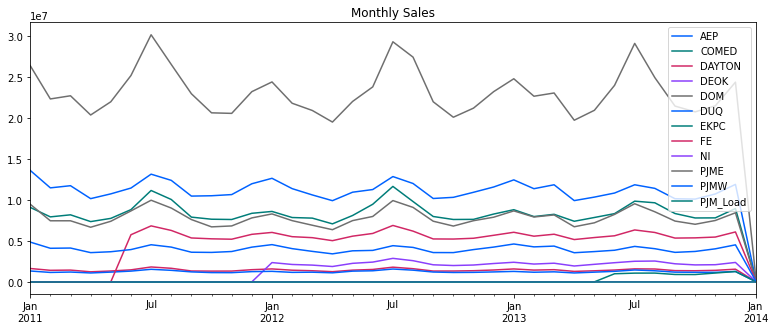

In [30]:
enrg_monthly_s.plot(figsize=plotsize, title='Monthly Sales')

<AxesSubplot:title={'center':'Monthly Sales % Change'}>

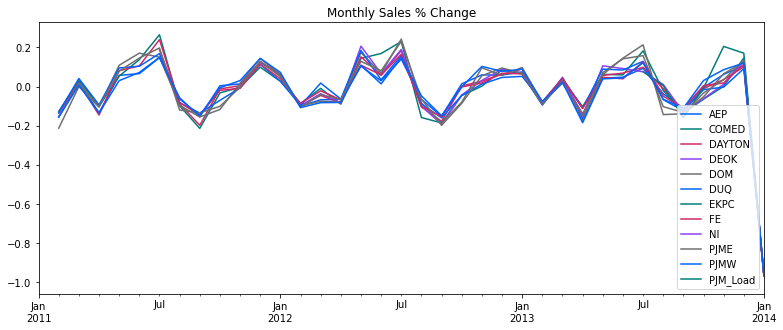

In [31]:
enrg_monthly_s.pct_change().plot(figsize=plotsize, title='Monthly Sales % Change')

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

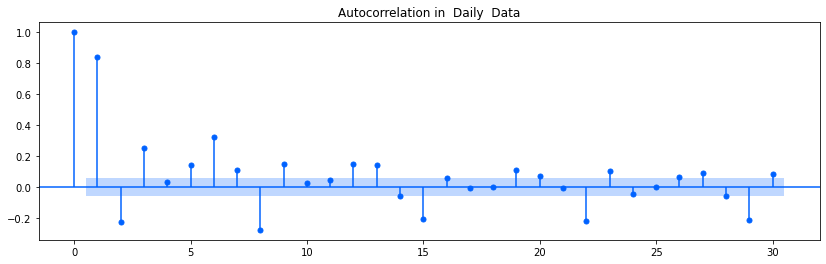

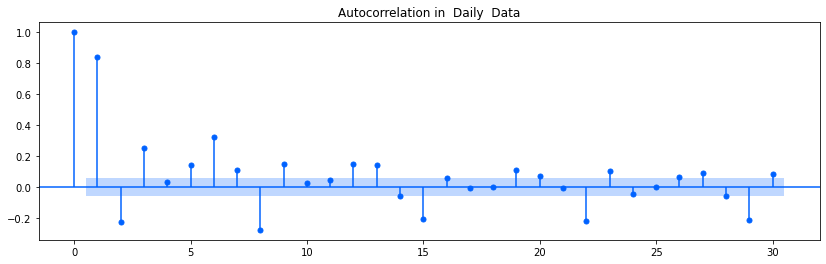

In [198]:
# we are just finding the lags
# it displays the first thirty lags...like for how many lags is autocorrelation statistically significant 1...12..24..30?
# plot_acf(enrg_monthly_s['PJME'], lags=30, title='Autocorrelation in  Daily  Data')
plot_pacf(enrg_daily_s['COMED'], lags=30, title='Autocorrelation in  Daily  Data')

In [34]:
len(enrg_monthly_s['PJME'])

37

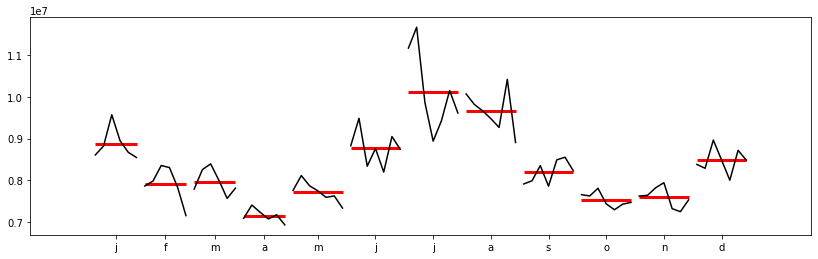

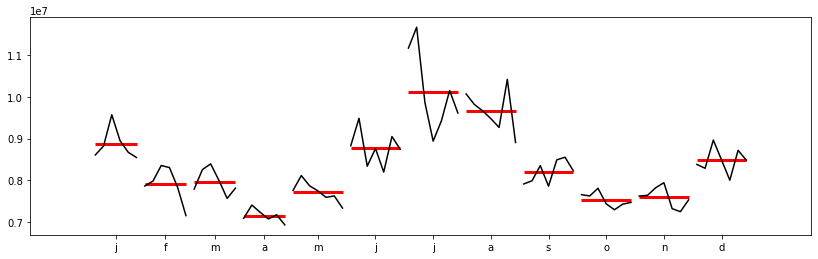

In [200]:
enrg_monthly=df.resample('M').sum()
month_plot(comed_M_sdf['COMED'])

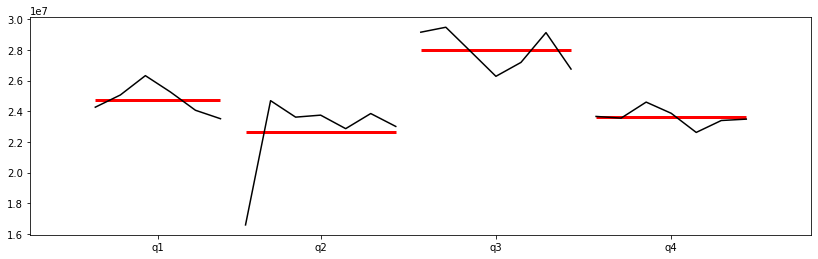

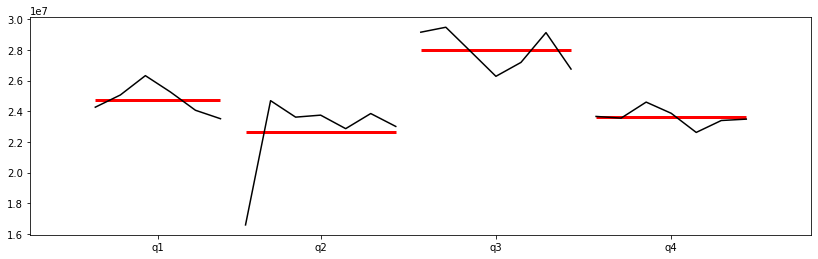

In [201]:
enrg_qu=comed_M_sdf.COMED.resample('Q').sum()
quarter_plot(enrg_qu)

In [37]:
time = np.arange(1, 51)
np.random.seed(10)  # reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

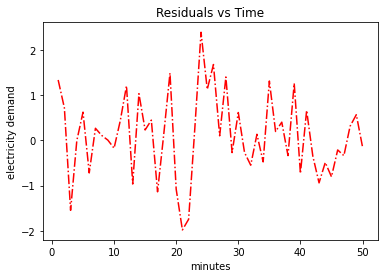

In [38]:
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
comed_m_s=enrg_monthly_s['COMED']

In [41]:
ss_decomposition = seasonal_decompose(x=comed_m_s, model='additive')
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

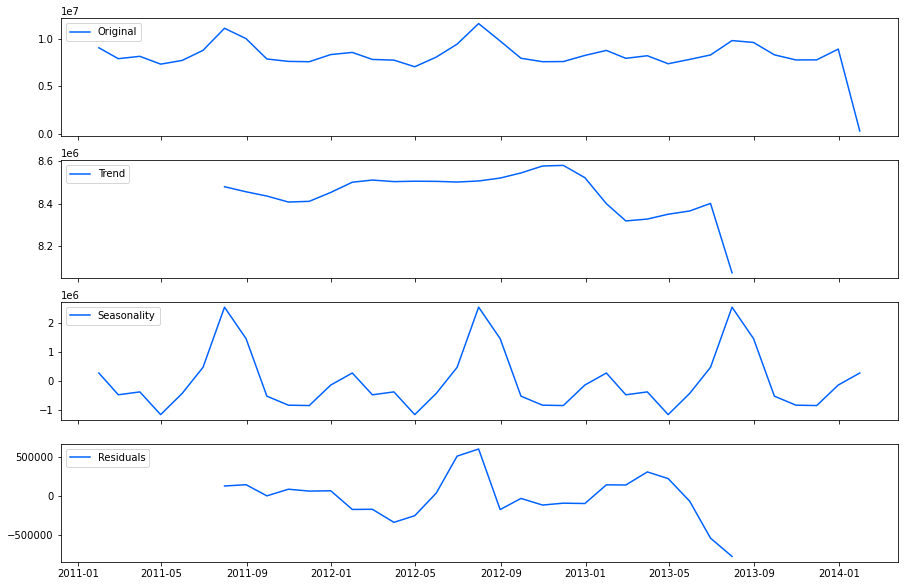

In [42]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(comed_m_s, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

We should use multiplicative models when the percentage change of our data is more important than the absolute value change (e.g. stocks, commodities); as the trend rises and our values grow, we see amplitude growth in seasonal and random fluctuations. If our seasonality and fluctuations are stable, we likely have an additive model.

In [43]:
ss_decomposition = seasonal_decompose(x=comed_m_s, model='multiplicative')
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

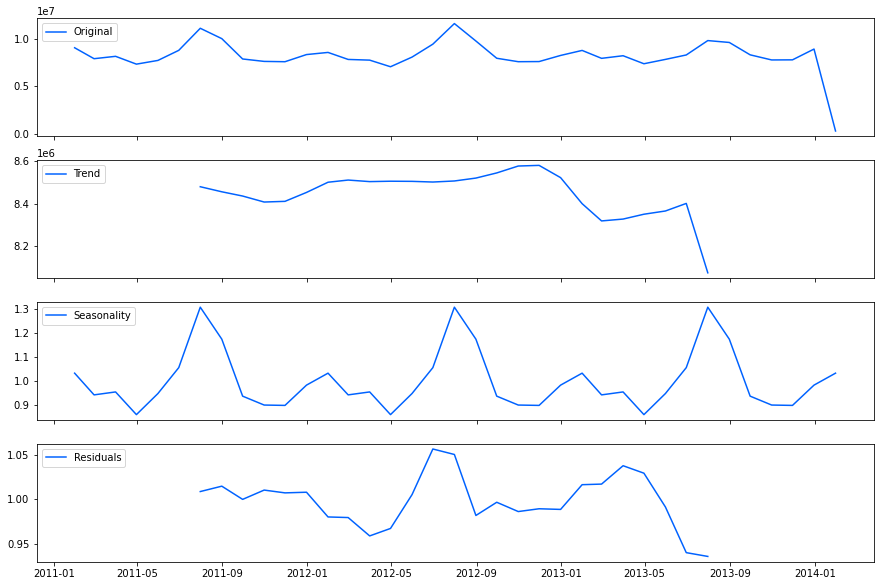

In [44]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(comed_m_s, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

Section 2: Identifying Stationarity
In this lesson, we will identify common techniques used to identify if a time series is stationary or not.

Specifically, we will cover:

Run-sequence plots
Summary statistics & histogram plots
Augmented Dickey-Fuller test

In [45]:
len(comed_m_s)

37

In [46]:
comed_m_s2=comed_m_s[:-1]
comed_m_s2=comed_m_s2/1000000
chunks = np.split(comed_m_s2, indices_or_sections=12)

In [47]:
# compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 8.41362 | 0.248321
    2 | 7.98435 | 0.381871
    3 | 9.71733 | 1.82967
    4 | 7.88663 | 0.122277
    5 | 8.08769 | 0.136233
    6 | 8.22951 | 0.963898
    7 | 9.82502 | 2.25599
    8 | 7.85044 | 0.0957441
    9 | 8.35283 | 0.121933
   10 | 7.87149 | 0.144746
   11 | 9.29382 | 0.449493
   12 | 8.19826 | 0.293342


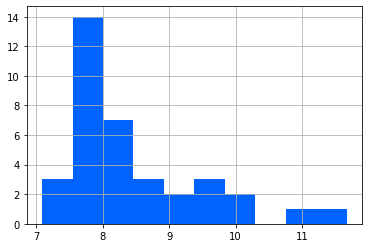

In [48]:
pd.Series(comed_m_s2).hist();

some deviations from normality

In [49]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(comed_m_s)

In [50]:
print(adf)

-2.2943271843054687


 The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -10. That may not mean anything to you just yet but the pvalue should.

In [51]:
print(pvalue)

0.17380409558034515


still....stationary

In [52]:
enrg_monthly=df.resample('D').sum()
comed_d=enrg_monthly['COMED']

In [53]:
ss_decompositionCD = seasonal_decompose(x=comed_d, model='additive')
estimated_trendCD = ss_decompositionCD.trend
estimated_seasonalCD = ss_decompositionCD.seasonal
estimated_residualCD = ss_decompositionCD.resid

In [54]:
estimated_trendCD=estimated_trendCD.dropna()

In [55]:
adfCD, pvalueCD,_,_,_,_= adfuller(estimated_trendCD)

In [56]:
print(adfCD)
print(pvalueCD)

-1.372681562330303
0.5953006087708175


In [57]:
adfCDs, pvalueCDs,_,_,_,_= adfuller(estimated_seasonalCD.dropna())

In [58]:
print(adfCDs)
print(pvalueCDs)

-1.3475321538277952e+16
0.0


0 doesn't make sense unless there is no seasonality

In [59]:
adfCDr, pvalueCDr,_,_,_,_= adfuller(estimated_residualCD.dropna())

In [60]:
print(adfCDr)
print(pvalueCDr)

-26.558519812814687
0.0


lagged...You may find this a surprising result as ADF says the series is nonstationary. Even though the series does have constant autocorrelation, it is not yet in a form that is techincally statinoary

You may find this a surprising result as ADF says the series is nonstationary. Even though the series does have constant autocorrelation, it is not yet in a form that is techincally statinoary

Section 3: Common Nonstationary-to-Stationary Transformations

Example 2: Remove Changing Variance w/Log Transformation

Log Transformation

Example 3: Removing Autocorrelation with Differencing

how do you know if your data has autocorrelation and how do you decide what lag to use when differencing? -next lesson

In [61]:
# run_sequence_plot(time, dataset_SNS_1,
#                   title="orignal")
# run_sequence_plot(time, dataset_SNS_1_log,
#                   title="dataset_SNS_1 (log)")
# plt.show()
# run_sequence_plot(time[:-1], dataset_SNS_2_diff,
#                   title="dataset_SNS_2 (differenced)")

smoothing=mean

In [62]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

In [63]:
comed_dna=np.array(comed_d.dropna())

In [64]:
len(comed_dna)

6942

In [65]:
comed_dna_cut=comed_dna[3:-3]

In [66]:
len(comed_dna_cut)

6936

In [67]:
estimated_residualCDna=np.array(estimated_residualCD.dropna())

In [68]:
len(estimated_residualCDna)

6936

In [69]:
mse(comed_dna_cut,estimated_residualCDna)/1000000000

194812.91297535

mean..good way to extract information if a trend is present? 
no, another way to approximate the underlying pattern inherent in the data...moving average

In [70]:
def moving_average(observations, window=3, forecast=False):
    '''returns the smoothed version of an array of observations.'''
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window]
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(3))
    else:
        return cumulative_sum[window - 1:] / window

In [71]:
comed_dna_cut_avg=moving_average(comed_dna_cut, window=7, forecast=False)

In [72]:
estimated_residualCDna_avg=moving_average(estimated_residualCDna, window=7, forecast=False)

In [73]:
mse(comed_dna_cut_avg,estimated_residualCDna_avg)/1000000000

194126.75599994833

In [74]:
comed_dna_cut_avg

array([     0.        ,      0.        ,      0.        , ...,
       273715.14285714, 279012.71428571, 284091.85714286])

In [75]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

In [76]:
comed_s_idx=enrg_daily_s[['COMED']]

In [77]:
comed_s_idx

,COMED
2011-01-01,"241,162.0"
2011-01-02,"270,137.0"
2011-01-03,"290,823.0"
2011-01-04,"299,994.0"
2011-01-05,"308,524.0"
...,...
2013-12-28,"251,382.0"
2013-12-29,"256,872.0"
2013-12-30,"303,641.0"
2013-12-31,"298,518.0"


In [78]:
len(comed_s_idx.index)

1097

In [79]:
time=np.arange(6936)

In [80]:
len(time)

6936

In [81]:
ss_decompositionC_idx = seasonal_decompose(x=comed_s_idx, model='additive')
estimated_trendC_idx  = ss_decompositionC_idx.trend

In [82]:
# estimated_trendC_idx

In [83]:
len(estimated_trendC_idx)

1097

In [84]:
estimated_trendC_idx=estimated_trendC_idx.fillna(0)

In [85]:
# estimated_trendC_idx

In [86]:
# estimated_trendCD
estimated_trendCDna=np.array(estimated_trendCD.dropna())

In [87]:
len(estimated_trendCDna)

6936

In [88]:
smoothed_trend = moving_average(estimated_trendCDna, window=7, forecast=False)

In [89]:
len(smoothed_trend)

6930

In [90]:
estimated_trendCDna

array([     0.        ,      0.        ,      0.        , ...,
       289941.71428571, 294791.14285714, 300317.        ])

In [91]:
time2=time[4300:]

In [92]:
len(time2)

2636

In [93]:
estimated_trendCDna2=estimated_trendCDna[4300:]

In [94]:
len(estimated_trendCDna2)

2636

In [95]:
# estimated_trendCDna2

In [96]:
smoothed_trend2=smoothed_trend[4300:]

In [97]:
len(smoothed_trend2)

2630

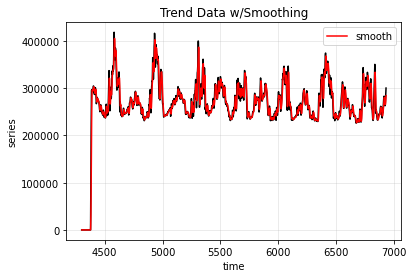

In [98]:
run_sequence_plot(time2, estimated_trendCDna2,
                  title="Trend Data w/Smoothing")
plt.plot(time2[1:], np.insert(smoothed_trend2,0,[0,0,0,0,0]), 'r', label="smooth")#now with 7 day roll avg, had to insert more zeros
plt.legend();

Good less data points almost same info

 most recent observations tend to impact the current to a larger degree than older ones.
This leads us to another averaging strategy: exponential smoothing

"Nonlinear Data w/MA Smoothing" omitted

In [99]:
# def ewma(observations, forecast=True):
#     '''returns the exponentially weighted smoothed version of an array of observations.'''
#     weights = np.array([0.160, 0.294, 0.543]) #can't do it!!!!!!!!
#     output = np.zeros_like(observations, dtype='float')
#     for i, _ in enumerate(observations):
#         if (i == 0) or (i == 1) or (i == len(observations) - 1):
#             pass
#         else:
#             output[i] = np.dot(observations[i-2:i+1], weights)
#     if forecast:
#         return np.insert(output, 0, 0)
#     else:
#         return output

In [100]:
enrg_monthly=df.resample('M').sum()

In [101]:
comed_M=enrg_monthly['COMED']

In [102]:
comed_M_s =comed_M.loc['2011-05-01':'2018-01-01']

In [103]:
ss_decompositionCM = seasonal_decompose(x=comed_M_s, model='additive')
estimated_trendCM = ss_decompositionCM.trend
estimated_seasonalCM = ss_decompositionCM.seasonal
estimated_residualCM = ss_decompositionCM.resid

# Section 3: Smoothed Time Series in Python

<AxesSubplot:title={'center':'COMED Monthly Sales'}>

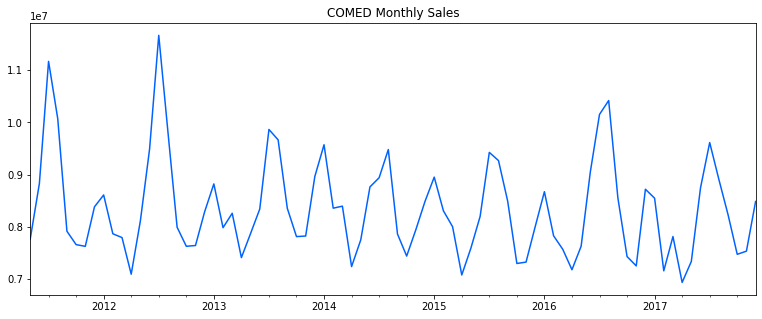

In [104]:
comed_M_s.plot(figsize=plotsize, title='COMED Monthly Sales')

In [105]:
len(comed_M_s)

80

In [106]:
comed_M_sna=np.array(comed_M_s.dropna())

In [107]:
train = comed_M_sna[:-10]
test = comed_M_sna[-10:]

In [108]:
len(train)

70

In [109]:
from statsmodels.tsa.api import Holt

double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mse(test, double_preds)
print("Predictions: ", double_preds)
print("MSE: ", double_mse)

Predictions:  [7048861.28579426 6937059.46167555 6825257.63755683 6713455.81343812
 6601653.98931941 6489852.16520069 6378050.34108198 6266248.51696326
 6154446.69284455 6042644.86872584]
MSE:  32597536802291.44


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [110]:
time3=np.arange(len(comed_M_sna))

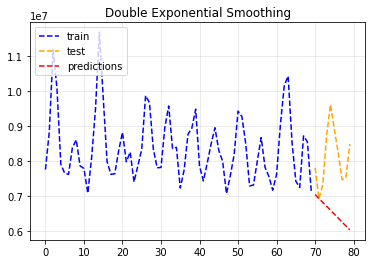

In [111]:
plt.plot(time3[:-10], train, 'b--', label="train")
plt.plot(time3[-10:], test, color='orange', linestyle="--", label="test")
plt.plot(time3[-10:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3);

In [112]:
from statsmodels.tsa.api import ExponentialSmoothing

In [113]:
triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=12).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test, triple_preds)
print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

Predictions:  [7164252.8865326  6493967.34197452 6960416.2551746  8092800.2093263
 9285735.09950664 9537908.68117081 8014328.73113728 7071746.93927003
 7160317.74492063 8256677.04525985]
MSE:  2072696341967.604


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


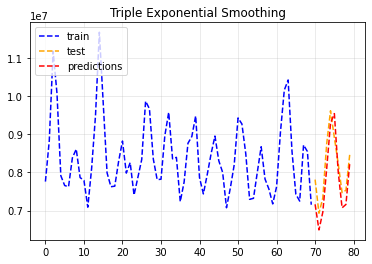

In [114]:
plt.plot(time3[:-10], train, 'b--', label="train")
plt.plot(time3[-10:], test, color='orange', linestyle="--", label="test")
plt.plot(time3[-10:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

In [115]:
double_mse/triple_mse

15.727116482169647

 reversion. This process refers to a time series that displays a tendency to revert to its historical mean value.
    This is in contrast to a random walk (aka Brownian motion), which has no "memory" of

autocoreelation can be modeled in its own way, allowing us to predict the future with a confidence level

lag  𝑘 :We use the plot of these values at different lags to determine optimal ARIMA parameters. 

AR models regress on actual past values

In [116]:
# import statsmodels as sm
import statsmodels.api as sm

In [117]:
# using ARMA model from statsmodel package
model = sm.tsa.ARMA(comed_M_sna, (1, 0)).fit(trend='nc', disp=0)
model.params

array([0.99327403])

 Set first two values to random values vs  # Set first value to random values vs

In [118]:
model = sm.tsa.ARMA(comed_M_sna, (2, 0)).fit(trend='nc', disp=0)
model.params

array([ 1.18647893, -0.19448093])

In [119]:
smoothed_CM = moving_average(comed_M_sna, window=3, forecast=False)

In [120]:
from statsmodels.tsa.arima_process import arma_generate_sample
y = arma_generate_sample(comed_M_sna, smoothed_CM, 100)##completely wrong use, 
#just give two params above array([ 1.18647893, -0.19448093]) for AR and 0 for MA to generate a sample, 
#not 80 values , just two!!

In [121]:
time100=np.arange(len(y))

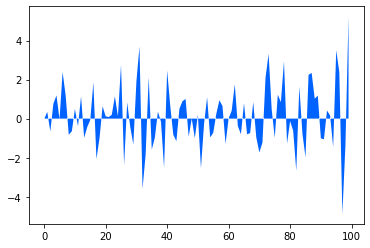

In [122]:
plt.fill_between(time100,y)#wrong , just needed a few params

Moving average smoothing is useful for estimating trend and seasonality of past data. MA models, on the other hand, are a useful forecasting model that regresses on past forecast errors in order to forecast future values

random shocks 

In [123]:
#MA model
# find model params for generated sample 
model = sm.tsa.ARMA(comed_M_sna, (0, 1)).fit(trend='nc', disp=0)
model.params

array([0.9308667])

In [124]:
model = sm.tsa.ARMA(comed_M_sna, (0, 2)).fit(trend='nc', disp=0)
model.params

array([1.39916389, 0.9998155 ])

In [205]:
model = sm.tsa.ARMA(comed_M_sna, (1,0)).fit(trend='nc', disp=0)
model.params

array([0.99327403])

In [204]:
model = sm.tsa.ARMA(comed_M_sna, (2, 0)).fit(trend='nc', disp=0)
model.params

array([ 1.18647893, -0.19448093])

AR processes will exhibit exponential decay in ACF and a cut-off in PACF
Moving Average Models (This is NOT a Simple/Weighted/Exponential Moving Average)
Some things to note:

MA models do not propagate shocks infinitely; they die after q lags
If a process depends on previous values of itself, then it is an AR process. If it depends on previous errors, then it is an MA process.
MA processes will exhibit exponential decay in PACF and a cut-off in ACF

Section 5: The Autocorrelation Function (ACF)
There's a crucial question we need to answer: How do you choose the orders (p and q) for a time series

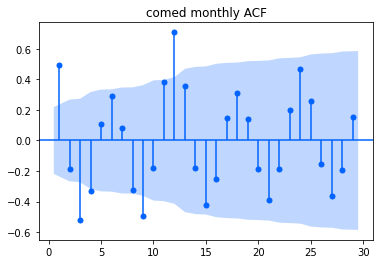

In [125]:
fig = sm.tsa.graphics.plot_acf(comed_M_sna, lags=range(1,30), alpha=0.05,title = 'comed monthly ACF')

Spring and fall correlated Also summer and winter

In [126]:
estimated_residualCMna=np.array(estimated_residualCM.dropna())

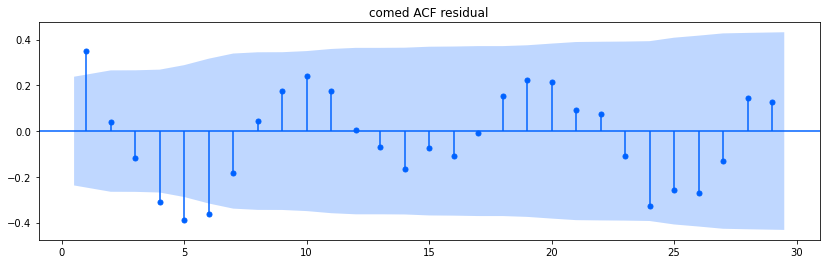

In [203]:
fig = sm.tsa.graphics.plot_acf(estimated_residualCMna, lags=range(1,30), alpha=0.05,title = 'comed ACF residual')

The second graph doesn't make sense anymore because you take the seasonality out but seasonality is what it's correlated on.
so this energy data seems to be a combination of AR & MA because they are components that's not decaying but it's decaying a little bit like in AR should decay and then there are shocks like in AM model

The stems represent lagged correlation values. In other words, a lag of 1 will show correlation with the prior endogenous value. A lag of 2 shows correlation to the value 2 prior and so on

Note that if lag 1 shows strong autocorrelation, lag 2 will show strong autocorrelation as well since lag 1 is correlated with lag 2 and lag 2 with lag 3

So an easy way to identify an ar(1) models or ma(1) model is to look to see if the correlation from one effects the next.

Section 6: The Partial Autocorrelation Function (PACF)
Choosing the order p of the AR model is important. Thankfully, there's a useful plot called the Partial Autocorrelation Function plot that can help us with that task.

In [128]:
from statsmodels.graphics.tsaplots import plot_pacf

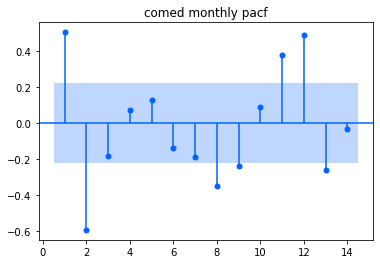

In [129]:
fig = sm.tsa.graphics.plot_pacf(comed_M_sna, lags=range(1,15), alpha=0.05, title = 'comed monthly pacf')

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags

The ACF is a way to measure the linear relationship between a current observation and observations at previous time periods. It turns out that often we are really only interested in the relationship between the current observation and a past value determined by a lag value. We often don't care about the relationship of values between the two, so we transform them to obtain the PACF.

The PACF is a useful tool for identifying the order of the AR model.

For MA(1) model we should see that it slowly decays towards 0?

# Course 6, Part f: SARIMA and Prophet DEMO

In [131]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

diff()erential better than log?

In [135]:
comed_M_sdf=pd.DataFrame(comed_M_s)

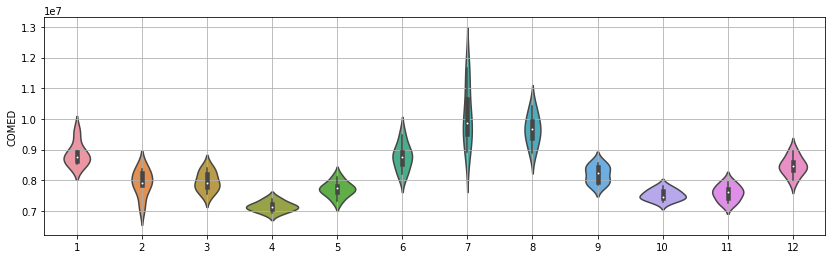

In [138]:
# violinplot of months to determine variance and range
plt.rcParams['figure.figsize'] = [14, 4]
sns.violinplot(x=comed_M_sdf.index.month, y=comed_M_sdf.COMED)
plt.grid(b=True);

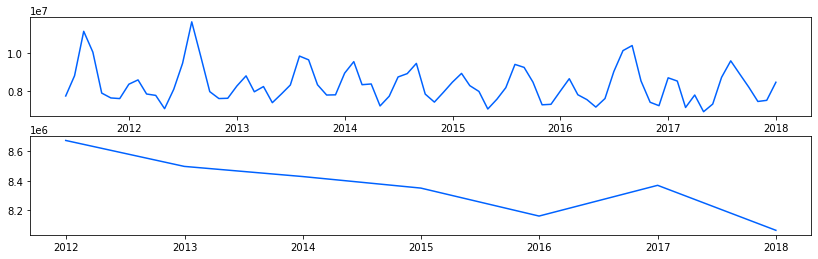

In [139]:
annual_temp = comed_M_sdf.resample('A').mean()
fig, axes = plt.subplots(2,1)
axes[0].plot(comed_M_sdf)
axes[1].plot(annual_temp)

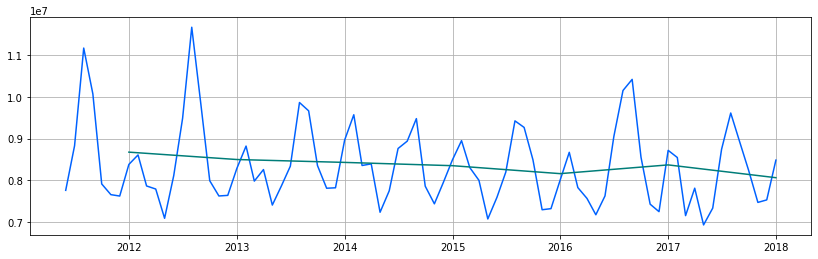

In [140]:
plt.plot(comed_M_sdf)
plt.plot(annual_temp)
plt.grid(b=True);

In [142]:
chunks = np.split(comed_M_sdf.COMED, indices_or_sections=10)

In [143]:
mean_vals = np.mean(chunks,axis=1)
var_vals = np.var(chunks,axis=1)
vals = {'mean_vals': mean_vals , 'var_vals': var_vals}
mean_var = pd.DataFrame(vals)
mean_var

,mean_vals,var_vals
0,"8,674,946.4","1,480,154,541,834.0"
1,"8,804,691.1","1,882,655,222,047.1"
2,"8,000,708.8","180,710,116,644.2"
3,"8,585,500.2","594,711,493,876.2"
4,"8,560,065.9","567,099,992,066.4"
5,"8,006,689.2","303,838,558,541.9"
6,"8,198,651.2","590,560,445,713.2"
7,"8,560,318.8","1,320,384,469,176.7"
8,"7,798,751.1","447,873,359,848.6"
9,"8,288,804.0","567,497,685,822.0"


In [144]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic         -1.3
p-value                 0.6
Lags Used              12.0
Observations Used      67.0
Critical Value (1%)    -3.5
Critical Value (5%)    -2.9
Critical Value (10%)   -2.6
dtype: float64


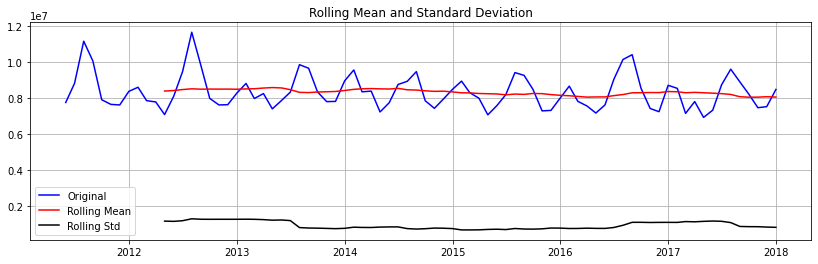

In [145]:
dftest(comed_M_sdf.COMED)

Test Statistic         -1.8
p-value                 0.4
Lags Used               1.0
Observations Used       5.0
Critical Value (1%)    -6.0
Critical Value (5%)    -3.9
Critical Value (10%)   -3.0
dtype: float64


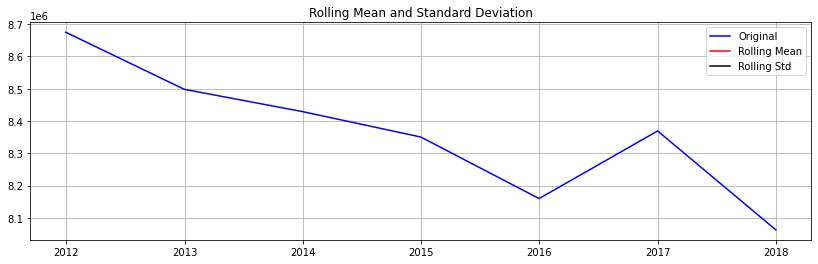

In [146]:
dftest(annual_temp.COMED)

In [153]:
estimated_residualCMnan=estimated_residualCM[6:74]

In [154]:
estimated_residualCMnandf=pd.DataFrame(estimated_residualCMnan)

In [155]:
estimated_residualCMnandf

,resid
2011-11-30,"-40,350.1"
2011-12-31,"-202,396.8"
2012-01-31,"-422,673.6"
2012-02-29,"-248,403.4"
2012-03-31,"-375,985.8"
...,...
2017-02-28,"-593,006.5"
2017-03-31,"79,691.9"
2017-04-30,"30,001.7"
2017-05-31,"-144,621.3"


Test Statistic         -6.2
p-value                 0.0
Lags Used               5.0
Observations Used      62.0
Critical Value (1%)    -3.5
Critical Value (5%)    -2.9
Critical Value (10%)   -2.6
dtype: float64


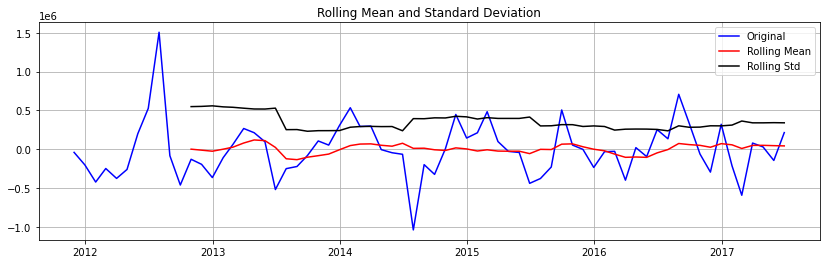

In [156]:
dftest(estimated_residualCMnandf.resid)

looks good!

pmdarima omitted

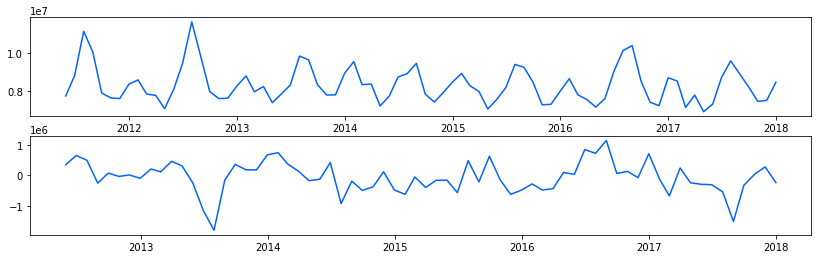

In [162]:
# Important to note that values have strong seasonality and adf test as well as rolling mean may not capture this.
# That is why it is always important to pay attention to run sequence plot
comed_M_sdf['lag_12'] = comed_M_sdf.COMED.shift(12)
comed_M_sdf['seasonal_diff'] = comed_M_sdf.COMED - comed_M_sdf['lag_12']

fig,axes = plt.subplots(2,1)
axes[0].plot(comed_M_sdf.COMED,label ='original')
axes[1].plot(comed_M_sdf.seasonal_diff,label = 'seasonal diff')

# Section 2: SARIMA with Statsmodels

e went through getting stationary data and differencing as that is the last piece of the puzzle that we are missing for understanding ARIMA models. The I stands for "Integrated" which just refers to the amount of differcing done on the data.

When we are determining our ARIMA model we will come across the following standard inputs:

order(p,d,q):
p is number of AR terms
d is number of times that we would difference our data
q is number of MA terms
When we work with SARIMA models 'S' refers to 'seasonal' and we have the additional standard inputs:

seasonal order(p,d,q):
p is number of AR terms in regards to seasonal lag
d is number of times that we would difference our seasonal lag (as seen above)
q is number of MA terms in regards to seasonal lag
s is number of periods in a season

Duke ARIMA Guide
Great explanation on MA in practice

Some rules to highlight from the Duke ARIMA Guide:

If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing
If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced. BEWARE OF OVERDIFFERENCING!!
A model with no orders of differencing assumes that the original series is stationary (mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that the original series has a time-varying trend (e.g. a random trend or LES-type model)

In [164]:
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data)
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

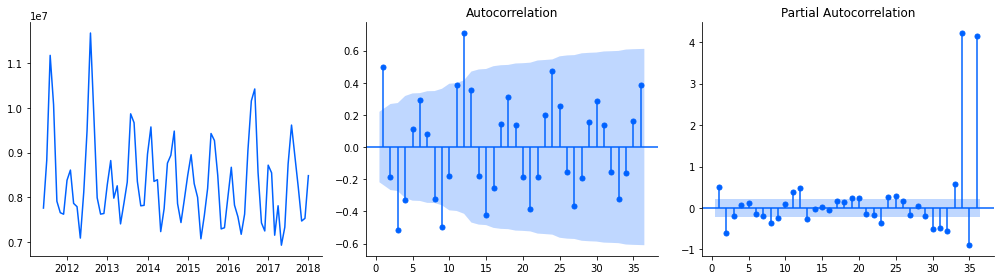

In [165]:
plots(comed_M_sdf.COMED, lags=36);

Algorithm	Trend	Seasonal	Correlations
ARIMA	      X	X	X
SMA Smoothing	X		
Simple Exponential Smoothing	X		
Seasonal Adjustment	X	X	
Holt's Exponential Smoothing	X		
Holt-Winters	X	X	

Box-Jenkins Method¶


In [167]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git

# fit SARIMA monthly based on helper plots

In [168]:
sar = sm.tsa.statespace.SARIMAX(comed_M_sdf.COMED, 
                                order=(1,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                COMED   No. Observations:                   80
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -988.221
Date:                              Mon, 11 Oct 2021   AIC                           1984.441
Time:                                      09:36:22   BIC                           1993.319
Sample:                                  05-31-2011   HQIC                          1987.959
                                       - 12-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.208e+04    5.9e+04     -0.714      0.475   -1.58e+05    7.35e+04
ar.L1          0.1379      0.048      2.847      0.004       0.043       0.233
ma.S.L12       0.0111      0.029      0.384      0.701      -0.045       0.068
sigma2      2.246e+11      0.033   6.74e+12      0.000    2.25e+11    2.25e+11
===================================================================================
Ljung-Box (L1) (Q):                   3.60   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.06   Prob(JB):                         0.05
Heteroskedasticity (H):               1.00   Skew:                            -0.49
Prob(H) (two-sided):                  0.99   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.12e+28. Standard errors may be unstable.
"""

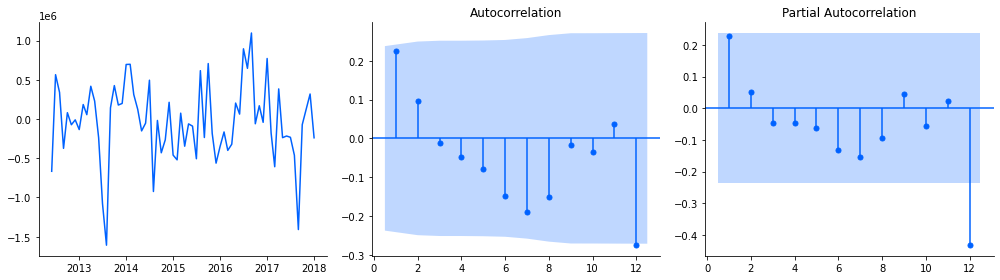

In [169]:
plots(sar.resid[sar.loglikelihood_burn:], lags=12);

it's the residual!

Thought process:

010010 is probably overdifferenced as we can see by negative ACF at lag 1

000010 is a big underdiff at seasonal lag, but with better AIC

Looks like 000010,12 and Trend='c' per rule

Looking back at seasonal we notice negative ACR spike at 12: we will thus add a SMA term and we see a big drop in AIC to 4289

looks like ACF looks good at seasonal lags, so we move back to ARIMA portion.

ACF shows we can use AR terms. AR=1,2 or 3 have similar AIC

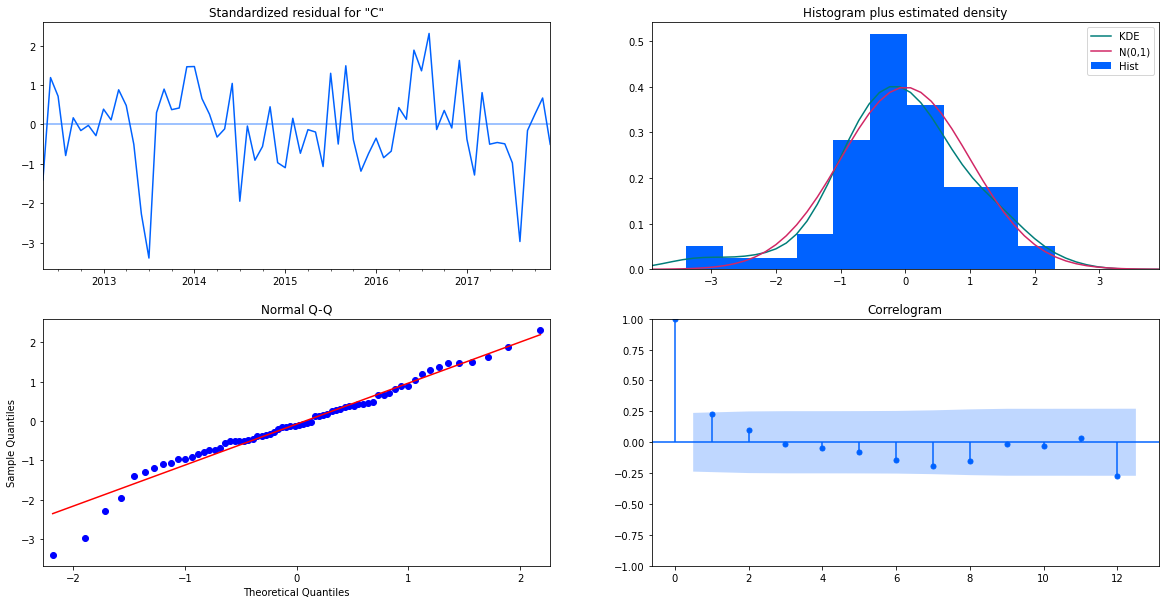

In [170]:
# plot residual diagnostics
sar.plot_diagnostics(lags=12,figsize = (20,10),);

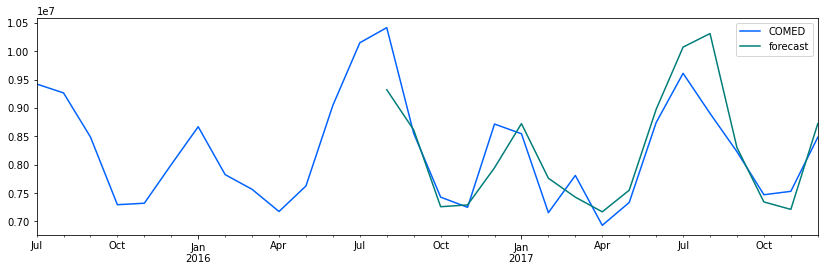

In [174]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
comed_M_sdf['forecast'] = sar.predict(start = 63, end= 80)  
comed_M_sdf[50:][['COMED', 'forecast']].plot();

In [175]:
#Introducing another model
sar2 = sm.tsa.statespace.SARIMAX(comed_M_sdf.COMED, 
                                order=(3,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()

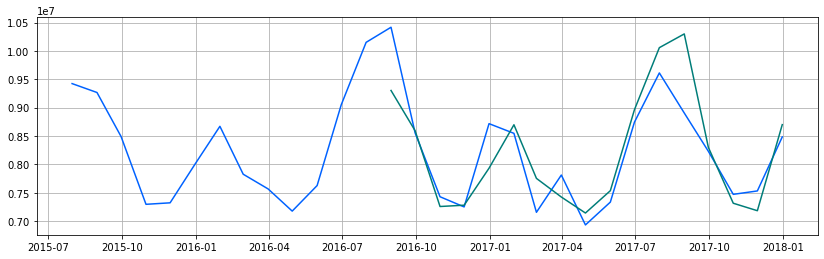

In [177]:
# plot predictions
comed_M_sdf['forecast'] = sar2.predict(start = 63, end= 80, dynamic=False)  
plt.plot(comed_M_sdf[50:][['COMED', 'forecast']])
plt.grid();

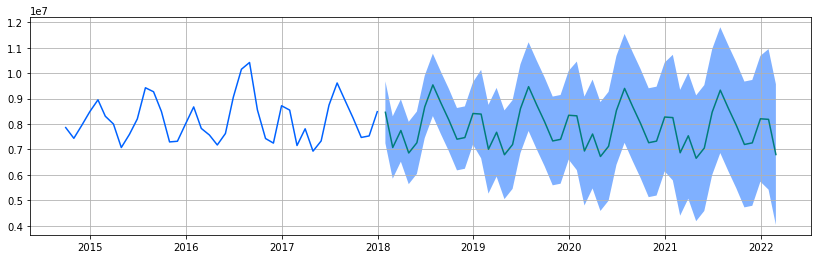

In [182]:
# can use get forecast to create a forecast object
future_fcst = sar2.get_forecast(50)
# That will have a method to pull in confidence interval 
confidence_int = future_fcst.conf_int(alpha = 0.01)
# confidence_int
# Has an attribute to pull in predicted mean
fcst = future_fcst.predicted_mean
# Plot predictions and confidence intervals
plt.plot(comed_M_sdf.COMED[-40:])
plt.plot(fcst)
plt.fill_between(confidence_int.index,confidence_int['lower COMED'],confidence_int['upper COMED'],alpha = 0.5)
plt.grid()

Section 3: Statistical Tests

In [183]:
# create and run statistical tests on model
norm_val, norm_p, skew, kurtosis = sar.test_normality('jarquebera')[0]
lb_val, lb_p = sar.test_serial_correlation(method='ljungbox',)[0]
het_val, het_p = sar.test_heteroskedasticity('breakvar')[0]


# we want to look at largest lag for Ljung-Box, so take largest number in series
# there's intelligence in the method to determine how many lags back to calculate this stat
lb_val = lb_val[-1]
lb_p = lb_p[-1]
durbin_watson = sm.stats.stattools.durbin_watson(
    sar.filter_results.standardized_forecasts_error[0, sar.loglikelihood_burn:])

print('Normality: val={:.3f}, p={:.3f}'.format(norm_val, norm_p));
print('Ljung-Box: val={:.3f}, p={:.3f}'.format(lb_val, lb_p));
print('Heteroskedasticity: val={:.3f}, p={:.3f}'.format(het_val, het_p));
print('Durbin-Watson: d={:.2f}'.format(durbin_watson))

Normality: val=6.188, p=0.045
Ljung-Box: val=18.025, p=0.157
Heteroskedasticity: val=0.995, p=0.991
Durbin-Watson: d=1.51


 is it done on residual?

In [184]:
# from dateutil.relativedelta import relativedelta
# def future_preds_df(model,series,num_months):
#     pred_first = series.index.max()+relativedelta(months=1)
#     pred_last = series.index.max()+relativedelta(months=num_months)
#     date_range_index = pd.date_range(pred_first,pred_last,freq = 'MS')
#     vals = model.predict(n_periods = num_months)
#     return pd.DataFrame(vals,index = date_range_index)

In [186]:
# preds = future_preds_df(stepwise_model,monthly_temp.temp,100)# cant do pm also enough

In [187]:
def cross_validate(series,horizon,start,step_size,order = (1,0,0),seasonal_order = (0,0,0,0),trend=None):
    '''
    Function to determine in and out of sample testing of arima model    
    
    arguments
    ---------
    series (seris): time series input
    horizon (int): how far in advance forecast is needed
    start (int): starting location in series
    step_size (int): how often to recalculate forecast
    order (tuple): (p,d,q) order of the model
    seasonal_order (tuple): (P,D,Q,s) seasonal order of model
    
    Returns
    -------
    DataFrame: gives fcst and actuals with date of prediction
    '''
    fcst = []
    actual = []
    date = []
    for i in range(start,len(series)-horizon,step_size):
        model = sm.tsa.statespace.SARIMAX(series[:i+1], #only using data through to and including start 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                trend=trend).fit()
        fcst.append(model.forecast(steps = horizon)[-1]) #forecasting horizon steps into the future
        actual.append(series[i+horizon]) # comparing that to actual value at that point
        date.append(series.index[i+horizon]) # saving date of that value
    return pd.DataFrame({'fcst':fcst,'actual':actual},index=date)

In [190]:
warnings.filterwarnings("ignore")
series = comed_M_sdf.COMED
horizon = 12
start = 40
step_size = 3
order = (1,0,0)
seasonal_order = (0,1,1,12)

cv1 = cross_validate(comed_M_sdf.COMED,12,40,3,
                    order = order,
                    seasonal_order = seasonal_order)

In [191]:
cv1.head()

,fcst,actual
2015-09-30,"7,850,845.0","8,489,748.0"
2015-12-31,"8,478,697.9","8,002,617.0"
2016-03-31,"7,993,370.8","7,565,961.0"
2016-06-30,"8,189,595.1","9,049,192.0"
2016-09-30,"8,498,631.2","8,553,477.0"


<AxesSubplot:title={'center':'forecast every three months using one year prior data'}>

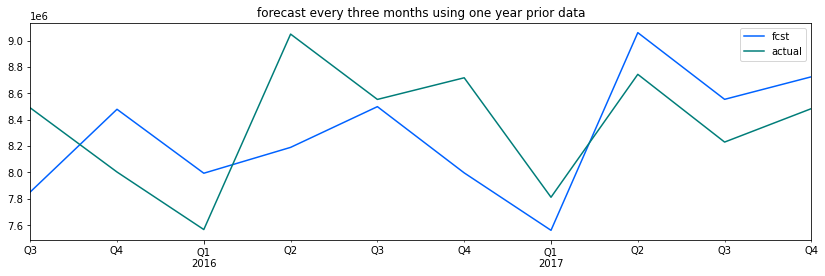

In [192]:
cv1.plot(title = 'forecast every three months using one year prior data')

In [193]:
#Defining an error metric to see out of sample accuracy
def mape(df_cv):
    return abs(df_cv.actual - df_cv.fcst).sum() / df_cv.actual.sum()

In [194]:
mape(cv1)

0.051547401020193936

In [195]:
def grid_search_ARIMA(series,horizon,start,step_size,orders = [(1,0,0)],seasonal_orders = [(0,0,0,0)],trends=[None]):
    best_mape = np.inf
    best_order = None
    best_seasonal_order = None
    best_trend = None
    for order_ in orders:
        for seasonal_order_ in seasonal_orders:
            for trend_ in trends:
                
                cv = cross_validate(series,
                                    horizon,
                                    start,
                                    step_size,
                                    order = order_,
                                    seasonal_order = seasonal_order_,
                                    trend=trend_)
                if mape(cv)<best_mape:
                    best_mape = mape(cv)
                    best_order = order_
                    best_seasonal_order = seasonal_order_
                    best_trend = trend_
    return (best_order,best_seasonal_order, best_trend, best_mape)

In [197]:
series = comed_M_sdf.COMED
horizon = 12
start = 760
step_size = 3
orders = [(1,1,0),(1,0,0)]
seasonal_orders = [(0,1,1,12)]
trends = [None,'c']

grid_search_ARIMA(series = series,
                  horizon = horizon,
                  start = start,
                  step_size = step_size,
                  orders = orders,
                  seasonal_orders = seasonal_orders,
                  trends=trends)

(None, None, None, inf)